In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from math import sqrt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
import sklearn.preprocessing

import graphviz
from graphviz import Graph

import env
import wrangle
import os

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
# change setting to show all columns
pd.set_option('display.max_columns', None)

# Acquire

In [3]:
# use function to pull in zillow data
df = wrangle.get_zillow_data()
df.head()

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc
0,261.0,10952984,2417912,NaN,NaN,NaN,4.0,4.0,NaN,8.0,4.0,NaN,NaN,2961.0,2961.0,NaN,NaN,NaN,NaN,6037.0,NaN,4.0,NaN,NaN,NaN,2.0,34193355.0,-118307273.0,8127.0,1.0,NaN,NaN,NaN,1.0,0101,BUR1*,6.037310e+07,396054.0,3101.0,NaN,96433.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1963.0,NaN,NaN,331167.0,546265.0,2016.0,215098.0,6071.89,NaN,NaN,6.037310e+13,892,0.034615,2017-01-05,Single Family Residential
1,261.0,12653289,2871196,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1572.0,1572.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,7.0,33726742.0,-118301532.0,5000.0,NaN,NaN,NaN,NaN,NaN,0104,LAR1,6.037297e+07,12447.0,3101.0,54300.0,96221.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1924.0,NaN,NaN,105762.0,227863.0,2016.0,122101.0,2770.35,NaN,NaN,6.037297e+13,891,-0.080755,2017-01-05,Single Family Residential
2,261.0,12612840,1514581,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,NaN,1540.0,1540.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,7.0,33797217.0,-118314255.0,5555.0,NaN,NaN,NaN,NaN,NaN,0100,LOR1*,6.037670e+07,53027.0,3101.0,NaN,96217.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1953.0,NaN,NaN,29440.0,63380.0,2016.0,33940.0,1104.70,NaN,NaN,6.037670e+13,889,0.079772,2017-01-05,Single Family Residential
3,261.0,12611007,216904,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,NaN,1470.0,1470.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33801082.0,-118312214.0,7287.0,NaN,NaN,NaN,NaN,NaN,0100,LOR1*,6.037670e+07,53027.0,3101.0,NaN,96217.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1958.0,NaN,NaN,71733.0,182691.0,2016.0,110958.0,2506.91,NaN,NaN,6.037670e+13,888,0.100001,2017-01-05,Single Family Residential
4,261.0,12023386,304078,NaN,NaN,NaN,2.0,2.0,NaN,8.0,2.0,NaN,NaN,1533.0,1533.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34109199.0,-118383568.0,3124.0,NaN,NaN,NaN,NaN,NaN,0100,LAR1,6.037194e+07,12447.0,3101.0,113749.0,96027.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1963.0,NaN,NaN,52583.0,87557.0,2016.0,34974.0,1229.29,NaN,NaN,6.037194e+13,886,-0.006511,2017-01-05,Single Family Residential


In [4]:
# check info (nulls, dtypes, columns, size, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52441 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   id                            52441 non-null  int64  
 3   airconditioningtypeid         13638 non-null  float64
 4   architecturalstyletypeid      70 non-null     float64
 5   basementsqft                  47 non-null     float64
 6   bathroomcnt                   52441 non-null  float64
 7   bedroomcnt                    52441 non-null  float64
 8   buildingclasstypeid           0 non-null      float64
 9   buildingqualitytypeid         33740 non-null  float64
 10  calculatedbathnbr             52304 non-null  float64
 11  decktypeid                    389 non-null    float64
 12  finishedfloor1squarefeet      4381 non-null   float64
 13  c

In [5]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror
count,52441,52441,52441,13638,70,47,52441,52441,0,33740,52304,389,4381,52359,52194,0,0,4381,165,52441,7243,52304,18015,18015,1515,33935,52441,52441,52072,11096,867,444,1071,10009,52441,51404,52441,19033,52415,52441,47,6724,76,33847,1937,63,52325,14561,81,52357,52440,52441,52440,52437,2079,52318,52441,52441
mean,261,1.29991e+07,1.49727e+06,2.43804,7.1,678.979,2.2994,3.30068,nan,6.26417,2.30474,66,1545.61,1922.89,1925.05,nan,nan,1566.37,1241.08,6049.13,1.20986,2.23958,1.94899,495.876,1,3.96629,3.40225e+07,-1.18194e+08,11339.6,1,518.318,1,1,1,6.04944e+07,33501.4,2524.59,180267,96635.8,1.89371,7,1.01368,5.97368,1.00092,337.628,225.619,1963.39,1.41391,1,196534,529688,2016,333465,6453.51,14.1025,6.05024e+13,38859.9,0.0182985
std,0,3.41144e+06,859439,3.84618,2.66567,711.825,1.02277,0.949094,nan,1.71616,1.01797,0,674.865,1004.37,1004.28,nan,nan,744.523,776.959,21.0291,0.512885,0.993207,0.549944,157.045,0,2.56251,273979,356663,86747.6,0,156.468,0,0,0,208689,49175.2,803.99,159825,4605.11,3.14644,0,0.142616,0.229416,0.0312116,250.022,188.505,23.1336,0.540677,0,254340,751895,0,570528,8755.57,2.39497,1.85904e+12,22348,0.177501
min,261,1.07119e+07,349,1,2,38,0,0,nan,1,1,66,184,128,128,nan,nan,184,380,6037,1,1,0,0,1,1,3.33406e+07,-1.19475e+08,236,1,24,1,1,1,6.0371e+07,3491,1286,6952,95982,0,7,1,4,1,11,12,1878,1,1,129,1000,2016,161,49.18,4,6.0371e+13,0,-4.65542
25%,261,1.15102e+07,757955,1,7,263.5,2,3,nan,5,2,66,1151,1268,1270,nan,nan,1152,784,6037,1,2,2,426,1,2,3.38269e+07,-1.18401e+08,5583,1,424.5,1,1,1,6.0374e+07,12447,1286,41131,96206,0,7,1,6,1,200,71.5,1950,1,1,77071,193748,2016,76020.8,2656.22,14,6.0374e+13,19546,-0.0246388
50%,261,1.25776e+07,1.50081e+06,1,7,512,2,3,nan,6,2,66,1410,1659,1660.5,nan,nan,1414,1008,6037,1,2,2,462,1,2,3.40238e+07,-1.18153e+08,6840.5,1,500,1,1,1,6.03762e+07,24812,3101,118208,96412,0,7,1,6,1,280,180,1961,1,1,131811,373612,2016,218032,4647.74,15,6.03762e+13,38927,0.00701078
75%,261,1.41295e+07,2.24153e+06,1,7,809.5,3,4,nan,8,3,66,1759,2306,2308,nan,nan,1770,1320,6059,1,3,2,567,1,7,3.41872e+07,-1.17929e+08,8798.25,1,600,1,1,1,6.05904e+07,40227,3101,274514,96995,5,7,1,6,1,400,317,1979,2,1,226334,619301,2016,408607,7377.5,15,6.05904e+13,58092,0.040692
max,261,1.67688e+08,2.98227e+06,13,21,3560,18,14,nan,12,18,66,6912,21929,21929,nan,nan,12467,5598,6111,5,18,14,4251,1,24,3.48188e+07,-1.17555e+08,6.97101e+06,1,1500,1,1,1,6.11101e+07,396556,3101,764167,399675,15,7,7,6,3,3191,868,2016,6,1,9.1649e+06,4.90612e+07,2016,4.89522e+07,586639,99,4.8303e+14,77612,5.263


In [6]:
# check that all properties had a transaction during 2017
df.transactiondate.value_counts()

2017-06-30    810
2017-04-28    617
2017-05-31    566
2017-07-28    546
2017-08-31    528
             ... 
2017-03-11      1
2017-04-08      1
2017-05-07      1
2017-09-09      1
2017-08-12      1
Name: transactiondate, Length: 257, dtype: int64

In [7]:
# check that all properties are single family residential
df.propertylandusedesc.value_counts()

Single Family Residential    52441
Name: propertylandusedesc, dtype: int64

### Takeaways So Far

* Many of the columns have a large percentage of nulls and can be dropped
* Many of the columns have information that is less relevant for predicting tax value and can be dropped
* Rename some of the columns for ease of reading
* An age column would be more useful than year built
* Change data type for some of the columns like bedrooms, FIPS, etc.
* Narrow down the results in the dataframe to be more representative of our average user and allow for better model with more accurate predictions

In [8]:
# save original columns to list
original_df_cols = df.columns.tolist()

In [9]:
# create a function to return list of columns with greater than a set percentage of nulls
def get_cols_with_large_null_percentage(df, percentage):
    '''
    This function takes in a dataframe and a percentage and returns a list of columns that have 
    a greater percentage of nulls than provided as an argument
    '''
    
    # Set null threshold. Any columns that have this ratio or higher of nulls will be removed
    null_perc_thresh = percentage

    # Create empty list to keep track of which columns to drop
    cols_with_many_nulls = []

    # Loop through df and append columns with null percentage higher than specified to cols_to_drop list
    for col in df.columns:
        num_nulls = df[col].isnull().sum()
        if num_nulls == 0:
            continue
        null_perc = num_nulls / len(df)
        if null_perc > null_perc_thresh:
            cols_with_many_nulls.append(col)
        
    return cols_with_many_nulls

In [10]:
# create variable to hold and review cols to drop
cols_to_drop = (get_cols_with_large_null_percentage(df, 0.35))
cols_to_drop

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [11]:
# drop columns with too many nulls
df = df.drop(columns=cols_to_drop)

In [12]:
# check columns
df.columns

Index(['propertylandusetypeid', 'parcelid', 'id', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'id.1', 'logerror',
       'transactiondate', 'propertylandusedesc'],
      dtype='object')

In [13]:
# specify more columns to drop if not likely usefule for predicting tax value
more_cols_to_drop = ['propertylandusetypeid','id','calculatedbathnbr',
                     'finishedsquarefeet12','fullbathcnt','latitude',
                     'longitude','propertycountylandusecode',
                     'rawcensustractandblock','regionidzip',
                     'structuretaxvaluedollarcnt','assessmentyear',
                     'landtaxvaluedollarcnt','taxamount',
                     'censustractandblock','id.1','logerror',
                     'transactiondate','propertylandusedesc',
                     'regionidcity','regionidcounty','parcelid','roomcnt']

In [14]:
# # drop additional columns
df = df.drop(columns=more_cols_to_drop)

In [15]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52441 non-null  float64
 1   bedroomcnt                    52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   fips                          52441 non-null  float64
 4   lotsizesquarefeet             52072 non-null  float64
 5   yearbuilt                     52325 non-null  float64
 6   taxvaluedollarcnt             52440 non-null  float64
dtypes: float64(7)
memory usage: 3.2 MB


In [16]:
# create an age column
df['age'] = 2021-df.yearbuilt
df.head(3)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,age
0,4.0,4.0,2961.0,6037.0,8127.0,1963.0,546265.0,58.0
1,2.0,3.0,1572.0,6037.0,5000.0,1924.0,227863.0,97.0
2,2.0,3.0,1540.0,6037.0,5555.0,1953.0,63380.0,68.0


In [17]:
# Rename some columns for simplicity
df = df.rename(columns={'bedroomcnt':'bedrooms',
                        'bathroomcnt':'bathrooms',
                        'calculatedfinishedsquarefeet':'area',
                        'lotsizesquarefeet':'lot_area',
                        'taxvaluedollarcnt':'taxvalue'})

In [18]:
# standard deviation is greater than the mean which tells me the data is not normally distributed
df.taxvalue.std()

751894.5533634222

In [19]:
# Zillow median home value for Cali in 2017 was $560,000 so this model will be focused specifically on properties within $200,000 of this number
df = df[(df.taxvalue > 360_000) & (df.taxvalue < 760_000)]
df.shape

(18108, 8)

In [20]:
# check bedroom value counts
df.bedrooms.value_counts()

3.0     8326
4.0     5897
2.0     2307
5.0     1261
6.0      168
1.0      103
7.0       20
0.0       18
9.0        4
8.0        3
11.0       1
Name: bedrooms, dtype: int64

In [21]:
# drop observations with less than two or more than five bedrooms since I will be focusing on the largest subset of our users
df = df[(df.bedrooms > 1) & (df.bedrooms < 6)]
df.shape

(17791, 8)

In [22]:
# remove outliers in other columns
df = wrangle.remove_outliers(df,1.25,['bathrooms','area','lot_area','age'])

In [23]:
# check number of observations with area less than 750 ft
(df.area < 750).sum()

53

In [24]:
# drop observations with area less than 750
df = df[df.area > 750]
df.shape

(14800, 8)

In [25]:
# drop rows with null values
df = df.dropna()
df.shape

(14800, 8)

In [26]:
# check for nulls
df.isnull().sum()

bathrooms    0
bedrooms     0
area         0
fips         0
lot_area     0
yearbuilt    0
taxvalue     0
age          0
dtype: int64

In [27]:
# Create list of datatypes I want to change
int_col_list = ['bedrooms','area','taxvalue','age']
obj_col_list = ['yearbuilt']
    
# Change data types where it makes sense
for col in df:
    if col in int_col_list:
        df[col] = df[col].astype(int)
    if col in obj_col_list:
        df[col] = df[col].astype(int).astype(object)

In [28]:
# check descriptive statistics
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bathrooms,bedrooms,area,fips,lot_area,taxvalue,age
count,14800,14800,14800,14800,14800,14800,14800
mean,2.21959,3.3025,1769.02,6053.04,6590.81,514889,55.2442
std,0.663083,0.765352,550.712,23.1871,1955.72,107421,20.3167
min,1,2,752,6037,1836,360027,9
25%,2,3,1346,6037,5350,424000,41
50%,2,3,1678,6037,6480,496086,58
75%,3,4,2122,6059,7700,595242,69
max,4,5,3331,6111,11815,759988,102


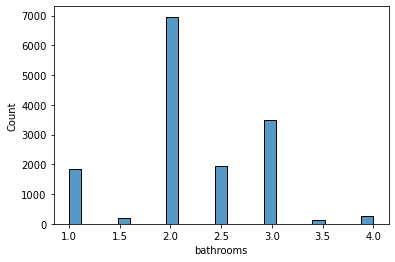

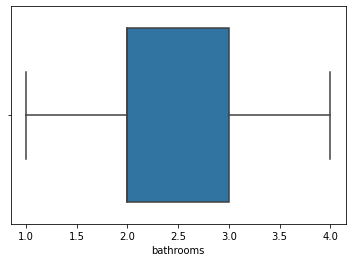

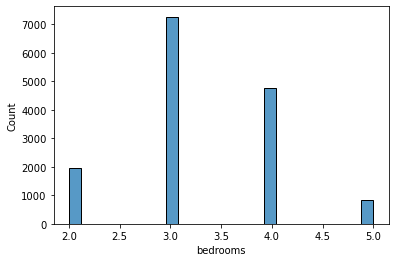

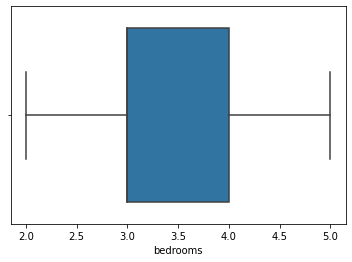

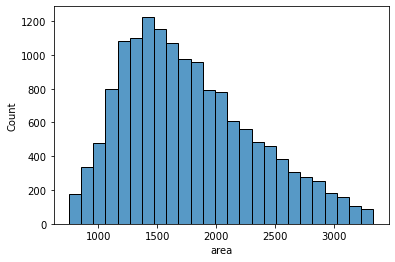

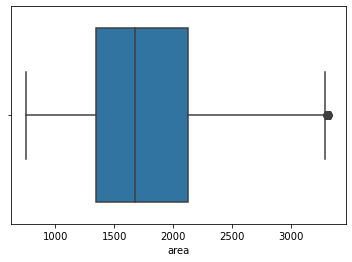

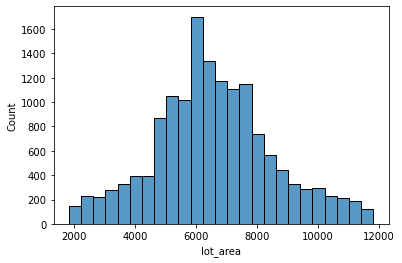

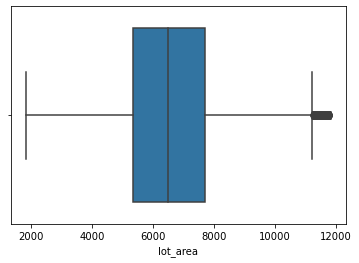

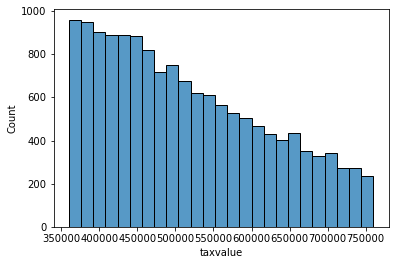

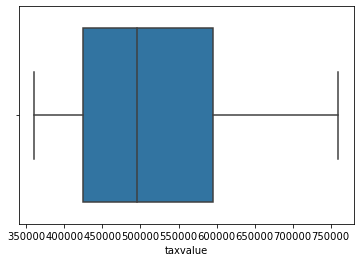

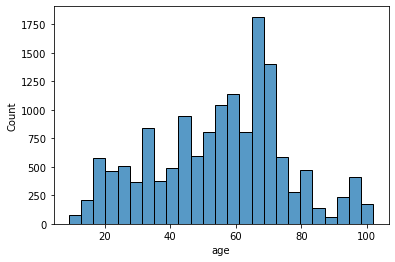

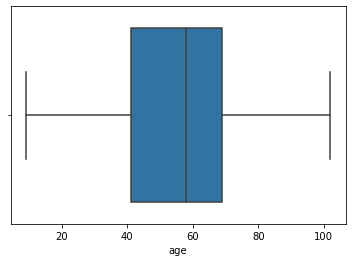

In [29]:
# check distribution of numerical columns
num_cols = [col for col in df if col not in ['fips','yearbuilt']]
for col in num_cols: 
    sns.histplot(df[col], log_scale=[False,False], bins=25)
    plt.show()
    sns.boxplot(df[col])
    plt.show()

In [30]:
# check fips value counts
df.fips.value_counts()

6037.0    8028
6059.0    5072
6111.0    1700
Name: fips, dtype: int64

In [31]:
# replace fips number with city and state they represent for readability
df.fips = df.fips.replace({6037:'los_angeles',6059:'orange',6111:'ventura'})

In [32]:
# encode fips column
dummy_df = pd.get_dummies(df['fips'])
dummy_df.head()

,los_angeles,orange,ventura
0,1,0,0
11,1,0,0
12,1,0,0
14,0,0,1
19,0,0,1


In [33]:
# concatenate dummy variables onto df and drop fips column
df = pd.concat([df, dummy_df], axis=1)
df.head(3)

,bathrooms,bedrooms,area,fips,lot_area,yearbuilt,taxvalue,age,los_angeles,orange,ventura
0,4.0,4,2961,los_angeles,8127.0,1963,546265,58,1,0,0
11,2.0,2,1958,los_angeles,6162.0,1946,414350,75,1,0,0
12,1.0,3,1473,los_angeles,5608.0,1953,566750,68,1,0,0


In [34]:
# drop object columns so df can be scaled
df = df.drop(columns=['fips','yearbuilt'])

In [35]:
# check function
df = wrangle.clean_zillow_data(wrangle.get_zillow_data())
df.shape

(14800, 9)

In [36]:
# check function
train, validate, test = wrangle.split_data(df)
train.shape, validate.shape, test.shape

((8288, 9), (3552, 9), (2960, 9))

In [37]:
train.head()

,bathrooms,bedrooms,area,lot_area,taxvalue,age,los_angeles,orange,ventura
50816,3.0,3,2612,6907.0,562338,14,1,0,0
31475,2.0,3,1374,6004.0,449420,70,1,0,0
36038,2.0,4,1310,4714.0,470000,45,0,0,1
36117,2.0,3,1095,6300.0,419390,66,0,1,0
13937,2.0,3,1294,6377.0,428000,71,1,0,0


In [38]:
# create function that scales train, validate, and test datasets using standardscaler
def scale_data_standardscaler(train, validate, test):
    # Create the scaler
    scaler = sklearn.preprocessing.StandardScaler()

    # Fit scaler on train dataset
    scaler.fit(train)

   # Transform and rename columns for all three datasets
    train_scaled = pd.DataFrame(scaler.transform(train), columns = train.columns.tolist())
    validate_scaled = pd.DataFrame(scaler.transform(validate), columns = train.columns.tolist())
    test_scaled = pd.DataFrame(scaler.transform(test), columns = train.columns.tolist())

    return train_scaled, validate_scaled, test_scaled

In [39]:
# test function
train_scaled, validate_scaled, test_scaled = scale_data_standardscaler(train, validate, test)
train_scaled.head()

,bathrooms,bedrooms,area,lot_area,taxvalue,age,los_angeles,orange,ventura
0,1.173690,-0.403961,1.516242,0.167044,0.449005,-2.020682,0.907713,-0.722006,-0.349896
1,-0.336329,-0.403961,-0.719296,-0.299131,-0.598010,0.722426,0.907713,-0.722006,-0.349896
2,-0.336329,0.901823,-0.834865,-0.965095,-0.407185,-0.502175,-1.101669,-0.722006,2.857996
3,-0.336329,-0.403961,-1.223104,-0.146321,-0.876459,0.526490,-1.101669,1.385031,-0.349896
4,-0.336329,-0.403961,-0.863757,-0.106569,-0.796624,0.771411,0.907713,-0.722006,-0.349896


In [40]:
# check overall function
def wrangle_zillow():
    '''This function acquires, cleans, and splits data from the zillow database for exploration'''
    # acquire, clean, and split
    train, validate, test = split_data(clean_zillow_data(get_zillow_data()))
    # scale data
    train_scaled, validate_scaled, test_scaled = scale_data_standardscaler(train, validate, test)
    
    return train, validate, test, train_scaled, validate_scaled, test_scaled

In [41]:
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle.wrangle_zillow()
train.shape, validate.shape, test.shape, train_scaled.shape, validate_scaled.shape, test_scaled.shape

((8288, 9), (3552, 9), (2960, 9), (8288, 9), (3552, 9), (2960, 9))